# Data Preprocessing, Standardization, and K-means clustering

We take our cleaned and formatted data and perform a number of steps to the data to preprocess and standardize before it is ready to use with our k-means clustering algorithm.

## Import libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure

## Import Data

In [2]:
clean_data = pd.read_csv('../data/cleaned_data.csv')

# Preprocessing

## Label Encoding/One Hot Encoding

We want to have our data as numerical type for the k-means clustering algorithm. Categorical data such as the column for "Study" pose a problem as the k-means algorithm cannot assign an appropriate value to a string. Two techniques that can solve this problem are label encoding and one hot encoding. Label encoding assigns a numerical value but this does not work for our dataset as it will assign values (1, 2, 3, etc.) which may imply a hierarchy that is not present in our data between each Study. We therefore explore the second option of one hot encoding which creates a new column for each of the 10 studies and then assigns the value 0 if it is not from this study or a 1 if it is. One hot encoding can cause problems when there are many categories but in this case we deemed it appropriate for use. 

We will use the label encoding technique to convert categorical variables to numbers and then use the one hot encoding toolkit from scikit-learn to convert these into binary values. Scikit-learn has a useful preprocessing module for this.

### Label Encoder

In [3]:
# create instance of labelencoder
labelencoder = LabelEncoder()
# Assign numerical values and store in a new column
clean_data['Study_no'] = labelencoder.fit_transform(clean_data['Study'])

Display this new column

In [4]:
clean_data

,Unnamed: 0,index,Deck_A,Deck_B,Deck_C,Deck_D,tot_win,tot_los,Subj,Study,Unique_ID,balance,Payoff,Study_no
0,0,Subj_1,12,9,3,71,5800,-4650,1,Fridberg,1,1150,1,0
1,1,Subj_2,24,26,12,33,7250,-7925,2,Fridberg,2,-675,1,0
2,2,Subj_3,12,35,10,38,7100,-7850,3,Fridberg,3,-750,1,0
3,3,Subj_4,11,34,12,38,7000,-7525,4,Fridberg,4,-525,1,0
4,4,Subj_5,10,24,15,46,6450,-6350,5,Fridberg,5,100,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,93,Subj_94,24,69,13,44,12150,-11850,94,Wetzels,613,300,2,7
613,94,Subj_95,5,31,46,68,9300,-7150,95,Wetzels,614,2150,2,7
614,95,Subj_96,18,19,37,76,9350,-7900,96,Wetzels,615,1450,2,7
615,96,Subj_97,25,30,44,51,10250,-9050,97,Wetzels,616,1200,2,7


### One Hot Encoding

In [5]:
# create instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')

# passing on Study_no column values
enc_df = pd.DataFrame(enc.fit_transform(clean_data[['Study_no']]).toarray())

# rename columns as Study names
enc_df = enc_df.rename(columns={0: 'Fridberg', 1: 'Horstmann', 2: 'Kjome', 3: 'Maia', 6: 'SteingroverInPrep', 4: 'Premkumar', 8: 'Wood', 9: 'Worthy', 5: 'Steingroever2011', 7: 'Wetzels'})

# reset index before concatenation
clean_data.reset_index(inplace=True)
enc = pd.concat([clean_data, enc_df], axis=1)
enc

,level_0,Unnamed: 0,index,Deck_A,Deck_B,Deck_C,Deck_D,tot_win,tot_los,Subj,...,Fridberg,Horstmann,Kjome,Maia,Premkumar,Steingroever2011,SteingroverInPrep,Wetzels,Wood,Worthy
0,0,0,Subj_1,12,9,3,71,5800,-4650,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,Subj_2,24,26,12,33,7250,-7925,2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2,Subj_3,12,35,10,38,7100,-7850,3,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,3,Subj_4,11,34,12,38,7000,-7525,4,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,4,Subj_5,10,24,15,46,6450,-6350,5,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,612,93,Subj_94,24,69,13,44,12150,-11850,94,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
613,613,94,Subj_95,5,31,46,68,9300,-7150,95,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
614,614,95,Subj_96,18,19,37,76,9350,-7900,96,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
615,615,96,Subj_97,25,30,44,51,10250,-9050,97,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Drop columns

In [6]:
df = enc.drop(columns=['level_0', 'index', 'Subj', 'Study', 'Study_no', 'Unnamed: 0', "Unique_ID", "balance"])
df

,Deck_A,Deck_B,Deck_C,Deck_D,tot_win,tot_los,Payoff,Fridberg,Horstmann,Kjome,Maia,Premkumar,Steingroever2011,SteingroverInPrep,Wetzels,Wood,Worthy
0,12,9,3,71,5800,-4650,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,24,26,12,33,7250,-7925,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,12,35,10,38,7100,-7850,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,11,34,12,38,7000,-7525,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10,24,15,46,6450,-6350,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,24,69,13,44,12150,-11850,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
613,5,31,46,68,9300,-7150,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
614,18,19,37,76,9350,-7900,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
615,25,30,44,51,10250,-9050,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Standardization

Generally speaking, learning algorithms perform better with standardized data. In our case there is a large variety in the 0 and 1 values for the studies and the total win and total loss values which vary from 14,750 to -2,725 and so we have chosen to standardize the whole data set. Scitkit-learn again offers a way to do this using the preprocessing module.

In [7]:
scaler = preprocessing.StandardScaler().fit(df)
X_scaled = scaler.transform(df)

In [8]:
#X_scaled.std(axis=0)
X_scaled.mean(axis=0)

array([-2.30321794e-17, -5.75804486e-17,  2.30321794e-17, -2.30321794e-17,
       -1.38193077e-16,  2.76386153e-16, -9.21287178e-17,  3.45482692e-17,
        4.60643589e-17,  3.45482692e-17,  0.00000000e+00, -3.45482692e-17,
       -4.60643589e-17,  0.00000000e+00,  0.00000000e+00, -1.38193077e-16,
       -2.30321794e-17])

In [9]:
#rename columns to clearly represent decks
sd = pd.DataFrame(X_scaled, columns=['Deck_A', 'Deck_B', 'Deck_C', 'Deck_D', 'tot_win', 'tot_los', 'Payoff', 'Fridberg', 'Horstmann', 'Kjome', 'Maia', 'Premkumar', 'Steingroever2011', 'SteingroverInPrep', 'Wetzels', 'Wood', 'Worthy'])
sd

,Deck_A,Deck_B,Deck_C,Deck_D,tot_win,tot_los,Payoff,Fridberg,Horstmann,Kjome,Maia,Premkumar,Steingroever2011,SteingroverInPrep,Wetzels,Wood,Worthy
0,-0.477115,-1.386904,-1.089197,2.131753,-1.471413,1.525683,-1.778972,6.335087,-0.596694,-0.178249,-0.263295,-0.205499,-0.319039,-0.35773,-0.266797,-0.574231,-0.245229
1,1.024186,-0.420182,-0.668854,0.038743,-0.538613,0.135451,-1.778972,6.335087,-0.596694,-0.178249,-0.263295,-0.205499,-0.319039,-0.35773,-0.266797,-0.574231,-0.245229
2,-0.477115,0.091612,-0.762264,0.314139,-0.635110,0.167288,-1.778972,6.335087,-0.596694,-0.178249,-0.263295,-0.205499,-0.319039,-0.35773,-0.266797,-0.574231,-0.245229
3,-0.602224,0.034746,-0.668854,0.314139,-0.699441,0.305250,-1.778972,6.335087,-0.596694,-0.178249,-0.263295,-0.205499,-0.319039,-0.35773,-0.266797,-0.574231,-0.245229
4,-0.727332,-0.533914,-0.528740,0.754773,-1.053262,0.804036,-1.778972,6.335087,-0.596694,-0.178249,-0.263295,-0.205499,-0.319039,-0.35773,-0.266797,-0.574231,-0.245229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,1.024186,2.025056,-0.622150,0.644614,2.613607,-1.530705,-0.262914,-0.157851,-0.596694,-0.178249,-0.263295,-0.205499,-0.319039,-0.35773,3.748170,-0.574231,-0.245229
613,-1.352875,-0.135852,0.919107,1.966515,0.780173,0.464437,-0.262914,-0.157851,-0.596694,-0.178249,-0.263295,-0.205499,-0.319039,-0.35773,3.748170,-0.574231,-0.245229
614,0.273535,-0.818244,0.498764,2.407149,0.812338,0.146063,-0.262914,-0.157851,-0.596694,-0.178249,-0.263295,-0.205499,-0.319039,-0.35773,3.748170,-0.574231,-0.245229
615,1.149295,-0.192718,0.825698,1.030169,1.391318,-0.342110,-0.262914,-0.157851,-0.596694,-0.178249,-0.263295,-0.205499,-0.319039,-0.35773,3.748170,-0.574231,-0.245229


## K- means clustering

Clustering involves grouping data points into groups based on their distance to the centroid of each cluster. It is an unsupervised technique using patterns within the data to decide upon the chosen groups. Within k-means, the k represents the number of clusters we require. We choose this value for k and so the best way to determine the most appropriate value of k is to run experiments for different values of k and then see which results in the least error. 

#### K means steps:

- The value of k must be decided
- k random points are selected as the initial centroids
- Each data point is assigned to a cluster based on their distance from the nearest initial centroid.
- A new centroid is then calculated from each cluster
- This process is iterated over until the data points settle in their appropriate cluster

This measure of distance d is the euclidean distance given by:

$$d = √((x1-y1)² + (x2-y2)²)$$


The elbow method and silhouette coefficient have resulted in a strong indication that k=10 for this data set. The elbow method did show a slight change in improvement at the k=3 and k=8 stage and the silhouette coefficient also at the k=8 stage. This reduces the potential that our data should be clustered according to the payload but we will explore the two options- k=3 and k=10.

## PCA dimensionality reduction

Principal component analysis is a method whereby we can reduce the dimensions used to represent our data. This can help with the curse of dimensionality which can often make clustering algorithms challenging with so many features. PCA helps us by taking all of these features and represents the data within a new set of features (the number of which we can decide). This can often help with the visualisation of cluster as we can reduce the features to 2 components which will healp to plot our points and therefore visualise the clustering algorithm and how well it represents our data.

In [10]:
#select how many features we want
pca = PCA(2)
#transform data
df = pca.fit_transform(sd)


## Choosing the value for k

The first step in the k-means algorithm involves calculating what is the most appropriate value for k. We will explore the elbow method and the silhoutte coefficient to determine our value for k within this project.

From our data exploration thus far we are interested in whether the data should be partitioned in 10 groups (k=10) for each study we have, or whether clustering would be best in 3 groups(k=3) to reflcet the 3 payoff schemes we have seen.

#### Elbow Method
The elbow method involves calculating the sum of squared error (SSE) and deciding at what point the modelling of the data is most appropriate. Often we can add further clusters without much gain in SSE and so we must determine at which point any further returns are no longer worthwhile.

$$ SSE = \sum_{i=1}^n (y_i-ŷ_i)^2$$

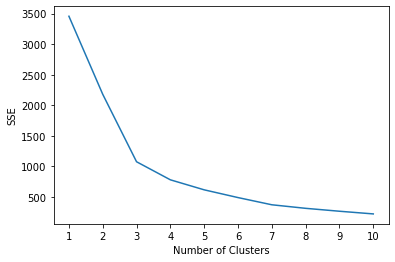

In [11]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)
    
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

k=3 appears to be a good fit using the elbow method and SSE

#### Silhouette Coefficient

The Silhouette coefficient is another measure of clustering and ranges between -1 and 1

 This value is calculated by the following equation:
 
 $$(y-x)/max(x,y)$$

Where:

x = average distance between each point in a cluster

y = average distance between all clusters

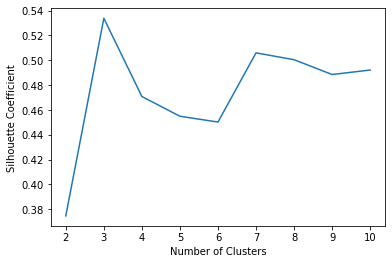

In [12]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df)
    score = silhouette_score(df, kmeans.labels_)
    silhouette_coefficients.append(score)

plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

Again we see that k=3 returns the highest value for the silhouette coefficient confirming that payoff scheme may be the most defining feature in the data for the outcome of the Iowa Gambling task.

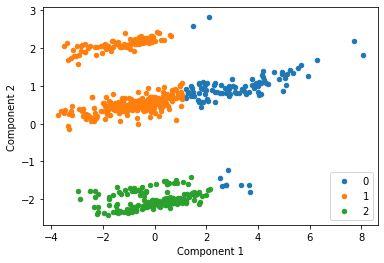

In [13]:
kmeans = KMeans(n_clusters= 3)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df)
 
#Getting unique labels
u_labels = np.unique(label)
 
#plotting the results:
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i, s=20)
plt.legend()
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

In [14]:
tmp = pd.DataFrame(df, columns=['Component_1', 'Component_2'])


original_labels = pd.concat([tmp, clean_data[["Study", "Payoff"]]], axis=1)

In [15]:
original_labels

,Component_1,Component_2,Study,Payoff
0,-2.954758,1.588772,Fridberg,1
1,-0.803481,1.928634,Fridberg,1
2,-1.099105,2.030063,Fridberg,1
3,-1.279225,2.022929,Fridberg,1
4,-2.055069,1.879925,Fridberg,1
...,...,...,...,...
612,4.101098,1.061376,Wetzels,2
613,0.162405,0.589999,Wetzels,2
614,0.561677,0.383470,Wetzels,2
615,1.692721,0.610974,Wetzels,2


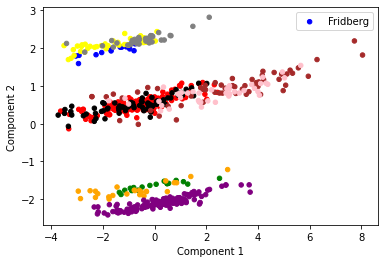

In [16]:
colors = {'Fridberg': 'blue','Horstmann': 'red','Kjome': 'green','Maia': 'yellow','SteingroverInPrep': 'black','Premkumar': 'orange','Wood': 'purple','Worthy': 'grey','Steingroever2011': 'brown','Wetzels': 'pink'}
#for i in range(618):
figure(figsize=(6, 4))
plt.scatter(original_labels['Component_1'], original_labels["Component_2"], c = original_labels["Study"].map(colors), s=20)
plt.legend(['Fridberg','Horstmann','Kjome','Maia','SteingroverInPrep','Premkumar','Wood','Worthy','Steingroever2011','Wetzels'])
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

No handles with labels found to put in legend.


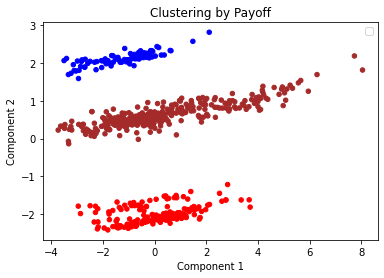

In [17]:
colors = {1: 'blue',2: 'brown',3:'red'}
#for i in range(618):
figure(figsize=(6, 4))
plt.scatter(original_labels["Component_1"], original_labels["Component_2"], c=original_labels["Payoff"].map(colors), s=20)
plt.legend()
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title("Clustering by Payoff")
plt.show()

## k=10 (without payoff data)

To explore the possibility that our data is impacted by the study in which it was recorded we drop the payoff column and then reduce the dimensionality before computing our clusters with k=10 

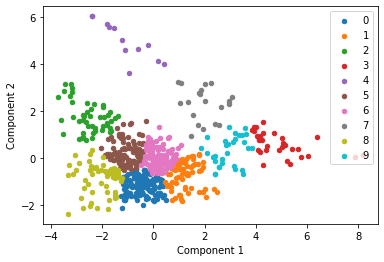

In [18]:
#w_out = pd.DataFrame(df, columns=['Component_1', 'Component_2'])
w_out_payoff = sd.drop(columns=["Payoff"])
w_out_payoff

pca = PCA(2)
w_out = pca.fit_transform(w_out_payoff)

kmeans = KMeans(n_clusters= 10)
 
#predict the labels of clusters.
label = kmeans.fit_predict(w_out)
 
#Getting unique labels
u_labels = np.unique(label)
 
#plotting the results:
for i in u_labels:
    plt.scatter(w_out[label == i , 0] , w_out[label == i , 1] , label = i, s=20)
plt.legend()
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()


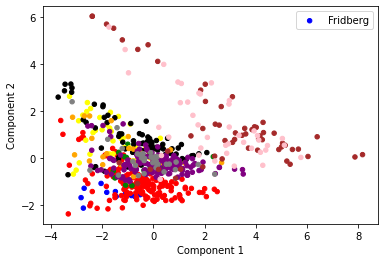

In [19]:
t = pd.DataFrame(w_out, columns=['Component_1', 'Component_2'])


t_labels = pd.concat([t, clean_data["Study"]], axis=1)

colors = {'Fridberg': 'blue','Horstmann': 'red','Kjome': 'green','Maia': 'yellow','SteingroverInPrep': 'black','Premkumar': 'orange','Wood': 'purple','Worthy': 'grey','Steingroever2011': 'brown','Wetzels': 'pink'}
#for i in range(618):
figure(figsize=(6, 4))
plt.scatter(t_labels['Component_1'], t_labels["Component_2"], c = t_labels["Study"].map(colors), s=20)
plt.legend(['Fridberg','Horstmann','Kjome','Maia','SteingroverInPrep','Premkumar','Wood','Worthy','Steingroever2011','Wetzels'])
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

## Analysis

The two features we have identified, Payoff scheme and study, have clearly impacted the results of this study. The clusters for payoff show how strongly weighted this was within the clustering algorithm. We can agree from this that the appropriate value for k is 3 and that using k=10 can also tell us an interesting insight into how these features may unexpectedly affect the final clustering result.